In [ ]:
"""
Compsci 571 Homework 2
Question 1 Basketball Court Classification
Yilin Gao (yg95)
Python 3.6
"""

In [96]:
"""Import libraries"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
from os import system

In [35]:
'''
the perceptron algorithm

parameter S: numpy array for the dataset (training/testing)
    S.shape = (n, p+1)
    each row is sample {xi, yi}, with p features and 1 label
parameter I: max number of epochs, default to 100
return epoch_w: w vector for each epoch number from 0 to 99
    epoch_w.shape = (100, p)
'''
def perceptron(S, I = 100):
    n = S.shape[0]
    p = S.shape[1] - 1
    epoch_w = np.empty([0, p])
    w = np.zeros([1, p])
    for e in range(0, I):
        mis = False # if in this epoch there is no more misclassified points
        for i in range(0, n):
            if S[i, -1].reshape(1, 1) * np.dot(w, S[i, 0:p]) <= 0:
                mis = True
                w = w + S[i, -1].reshape(1, 1) * S[i, 0:p]
        epoch_w = np.append(epoch_w, w, axis = 0)
        if (mis == False): # after this epoch all points are correctly classified, end and return current w
            print('Perceptron algorithm ends at epoch ' + str(e) + '.')
            return epoch_w
    print('Perceptron maximum epoch is reached.')
    return epoch_w

In [50]:
S = np.array([[0.75, 0.10, -1], [0.85, 0.8, -1], [0.85, 0.95, 1], [0.15, 0.1, -1], [0.05, 0.25, 1], [0.05, 0.5, 1], [0.85, 0.25, -1]])
S_pos = S[S[:, -1] == 1]
S_neg = S[S[:, -1] == -1]
n = S.shape[0]
print(S)

[[ 0.75  0.1  -1.  ]
 [ 0.85  0.8  -1.  ]
 [ 0.85  0.95  1.  ]
 [ 0.15  0.1  -1.  ]
 [ 0.05  0.25  1.  ]
 [ 0.05  0.5   1.  ]
 [ 0.85  0.25 -1.  ]]


In [7]:
"""
q1a
run Perceptron to compute a linear classifier going though the origin on the dataset
w initialized at [0, 0]
scan the observed points in the given order
"""
w_perc = perceptron(S)
print(w_perc)

Perceptron algorithm ends at epoch 2.
[[-0.9   0.5 ]
 [-1.05  1.1 ]
 [-1.05  1.1 ]]


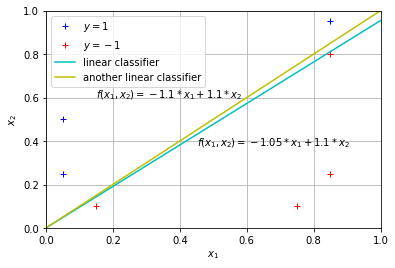

In [85]:
"""
q1a
plot observed data points and the perceptron weight after convergence
"""
plt.plot(S_pos[:, 0], S_pos[:, 1], 'b+', label = r'$y = 1$')
plt.plot(S_neg[:, 0], S_neg[:, 1], 'r+', label = r'$y = -1$')
# calculated decision boundary from perceptron
plt.plot([0, w_perc[-1, 1]], [0, -1 * w_perc[-1, 0]], 'c', label = 'linear classifier')
plt.text(0.45, 0.38, r'$f(x_1, x_2) = -1.05 * x_1 + 1.1 * x_2$' )
# another decision boundary with same error
plt.plot([0, 1.1], [0, 1.1], 'y', label = 'another linear classifier')
plt.text(0.15, 0.6, r'$f(x_1, x_2) = -1.1 * x_1 + 1.1 * x_2$' )
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.show()

In [99]:
"""
q1b
grow a fully-grown decision tree using Gini Index as the splitting criteria
"""
X = S[:, 0: -1]
y = S[:, -1]
# criteria is gini by default
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
yhat_tree = clf.predict(X)
error_tree = sum(yhat_tree != y) / n
print('Error rate of decision tree is', error_tree)

Error rate of decision tree is 0.0


In [108]:
# generate png file of the decision tree
dotfile = open('tree.dot', 'w')
tree.export_graphviz(clf, out_file = dotfile)
dotfile.close()
system('dot -Tpng tree.dot -o ../hw2_answer/images/q1b_tree.png')
system('rm tree.dot')

0

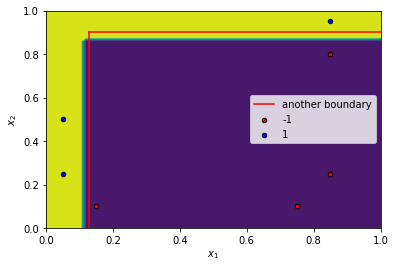

In [105]:
"""
q1b
plot observed data points and decision tree boundary after convergence

reference: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
"""
# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

# Plot the decision boundary
x_min, x_max = 0, 1.02
y_min, y_max = 0, 1.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Plot the training points
for i, color in zip([-1, 1], plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

# another decision boundary
plt.plot([0.13, 0.13], [0, 0.90], 'r', label = 'another boundary')
plt.plot([0.13, 1], [0.90, 0.90], 'r')

plt.legend()
plt.axis("tight")
plt.show()